# TP introduction to Machine Learning
Diane Lingrand (diane.lingrand@univ-cotedazur)

Julie Tores (julie.tores@univ-cotedazur.fr ou julie.tores@etu.univ-cotedazur.fr)

Polytech, SI4, 2023-24

In [1]:
#necessary imports
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## dataset: Iris

In [2]:
# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Question 1:** how many data ?

In [3]:
print(len(X))
print(len(y))


150
150


**Question 2**: type of data ? dimension of data ? type of labels ?

In [4]:
print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

(150, 4)
(150,)
float64
int64


**Question 3:** How many classes ? How many samples per class ?

In [5]:
# print distinct values of y
classes = np.unique(y)
print(f"Distinct values of y: {classes}")

classes_count = len(classes)
print(f"Number of distinct values of y: {classes_count}")

# count of each distinct value of y
print(f"Count of each distinct value of y: {np.bincount(y)}")

Distinct values of y: [0 1 2]
Number of distinct values of y: 3
Count of each distinct value of y: [50 50 50]


**Question 4:** choose 2 dimensions and plot the data in the plane using a different color for each class.

(150, 2)


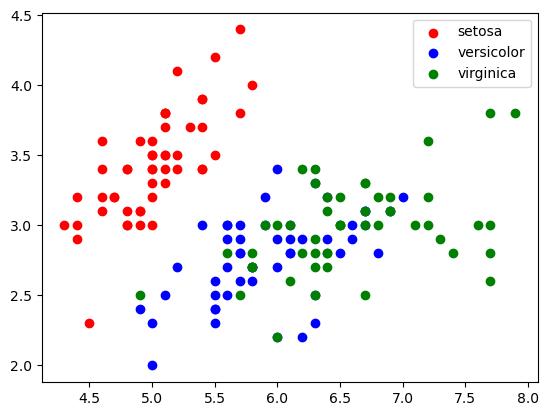

In [6]:
# X is (150, 4). Make it (150, 2) by taking only the first two features for plotting
X_plot = X[:, :2]
print(X_plot.shape)
# use different colors for each class
colors = ['red', 'blue', 'green']

classes_name = iris.target_names

# plot the data
for idx, cl in enumerate(np.unique(y)):
    class_vals = X_plot[y == cl]
    class_name = classes_name[cl]
    plt.scatter(class_vals[:, 0], class_vals[:, 1], c=colors[idx], label=class_name)

plt.legend()



**Question 5:** perfect classification. What are the metrics values ? Read the documention of metrics function in scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

metrics for perfect prediction
accuracy 1.0
recall [1. 1. 1.]
f1 [1. 1. 1.]


1.0

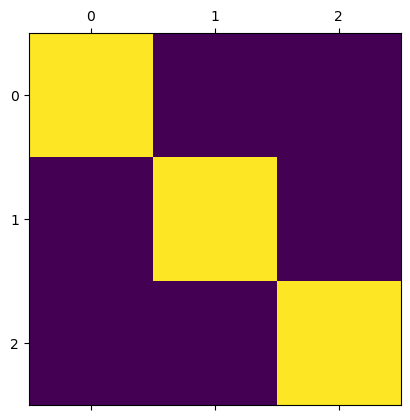

In [7]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# here is an example for accuracy: 


def metrics(y, y_pred):
    acuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average=None)
    f1 = f1_score(y, y_pred, average=None)
    print("accuracy", acuracy)
    print("recall", recall)
    print("f1", f1)

    confusion = confusion_matrix(y, y_pred)
    plt.matshow(confusion)

    return acuracy

print("metrics for perfect prediction")
metrics(y, y)

**Question 6**: random classification. What are the metrics values ? <br/>
*Hint*: use https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html for the generation of random labels. <br/>
Don't forget the confusion matrix. Hint: ConfusionMatrixDisplay https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

metrics for random classification
accuracy 0.34
recall [0.28 0.3  0.44]
f1 [0.28571429 0.32608696 0.4       ]


0.34

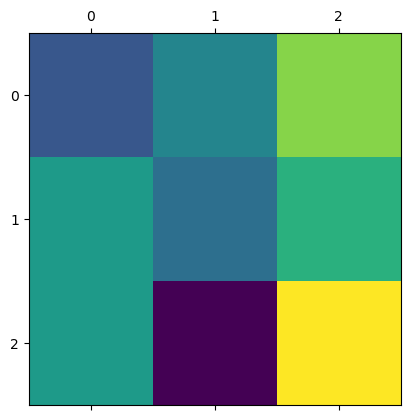

In [8]:
Y_rand = np.random.randint(0, classes_count, size=len(y))
print("metrics for random classification")
metrics(y, Y_rand)

### binary classification

In [9]:
# we choose to remove class with label 2 (Iris Virginica)
XBinaire = X[y!=2]
yBinaire = y[y!=2]


In [10]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XBinaire, yBinaire, test_size=0.4)

**Question 7**: Try to build a classifier better than the random one, use the thresholding on one or more component. Choose the thresholds using the train dataset and compute the metrics on the test dataset.
    

metrics for threshold classification
accuracy 1.0
recall [1. 1.]
f1 [1. 1.]


1.0

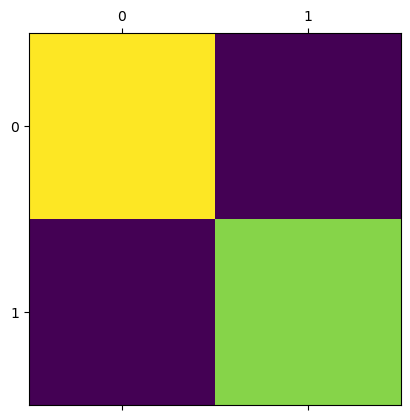

In [11]:
# according to the plot, we can see that the data is linearly separable with
# a line that goes through (4.5, 2.25) and (6, 3.5)
def line(x):
    return 0.833 * x - 1.5  # from https://planetcalc.com/8110/


# if the point is above the line, it is class 0, otherwise it is class 1
def threshold(x, y):
    return 0 if y > line(x) else 1

# predict
Y_threshold = np.array([threshold(x, y) for x, y in X_test[:, :2]])

# compute metrics
print("metrics for threshold classification")
metrics(y_test, Y_threshold)

**Question 8**: Using this method, could you propose an algorithm for classifying the 3 classes?

No, since there is no clear separation with the third class (at least according to the plot).

## dataset: digit

In [12]:
# reading the dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

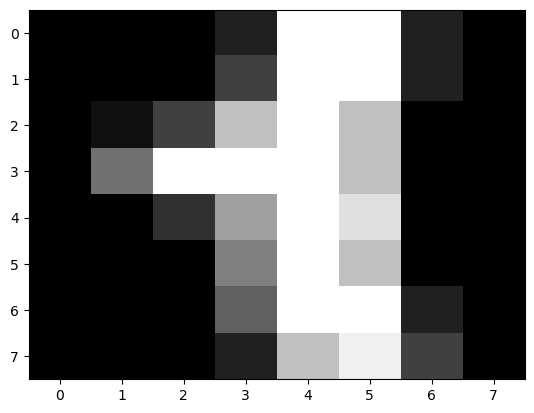

class =  1
[ 0.  0.  0.  2. 16. 16.  2.  0.  0.  0.  0.  4. 16. 16.  2.  0.  0.  1.
  4. 12. 16. 12.  0.  0.  0.  7. 16. 16. 16. 12.  0.  0.  0.  0.  3. 10.
 16. 14.  0.  0.  0.  0.  0.  8. 16. 12.  0.  0.  0.  0.  0.  6. 16. 16.
  2.  0.  0.  0.  0.  2. 12. 15.  4.  0.]


In [13]:
# display one of the pictures (the 22th in this code)
import matplotlib.pyplot as plt
i = 21 # index of the image: change it in order to display other images
plt.imshow(X[i].reshape((8,8)),aspect="auto",cmap='gray')
plt.show()
print('class = ', y[i])
print(X[i])

**Question 9**: Using the digit dataset, answer again to the previous questions from 1 to 8.

(1797, 64)
(1797,)
float64
int64


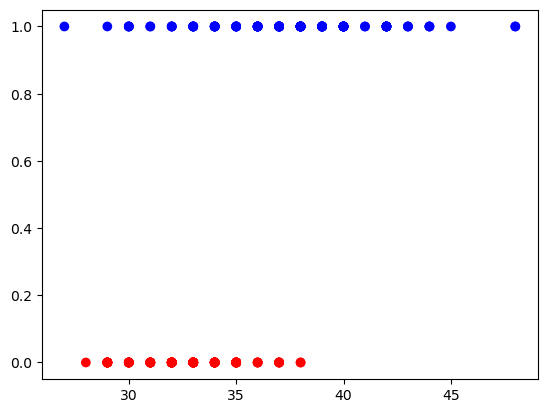

In [14]:
# Data shape
print(X.shape)
print(y.shape)

# Data type
print(X.dtype)
print(y.dtype)

# let's just skip to the classification part
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

# Let's keep only two classes: 0 and 1
X_train = X_train[y_train<2]
y_train = y_train[y_train<2]
X_test = X_test[y_test<2]
y_test = y_test[y_test<2]

# Now we need a dimensionality reduction method
# An image is a 8x8 matrix, so we have 64 features
# The digit zero usually has more black pixels than the digit one
# So we can count the number of black pixels and use it as a feature
# Let's consider a black pixel is a pixel with a value less than 3

def count_black_pixels(x):
    return np.count_nonzero(x < 3)

# apply the function to all images
X_train_black = np.apply_along_axis(count_black_pixels, 1, X_train)

# plot the data, using red for class 0 and blue for class 1
plt.scatter(X_train_black, y_train, c=['red' if y == 0 else 'blue' for y in y_train])


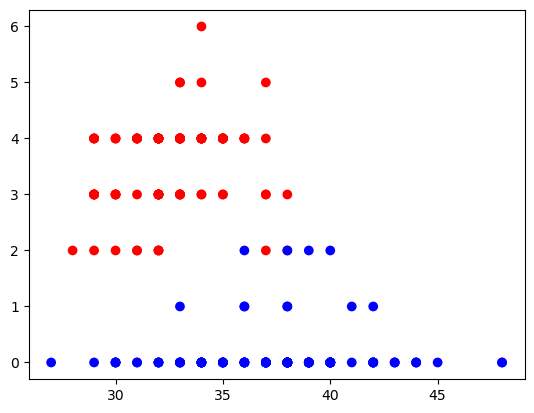

In [15]:
# there is no clear separation between the two classes
# so this is not good enough. We need another feature
# let's count the number of black pixels in the middle column (column 4)
def count_black_pixels_middle(x):
    middle = x.reshape((8, 8))[:, 4]
    return count_black_pixels(middle)


# apply the function to all images
X_train_middle_black = np.apply_along_axis(count_black_pixels_middle, 1,
                                           X_train)

# plot the data
plt.scatter(X_train_black, X_train_middle_black, c=['red' if y == 0 else 'blue' for y in y_train])

metrics for threshold classification
accuracy 0.9931506849315068
recall [0.98666667 1.        ]
f1 [0.99328859 0.99300699]


0.9931506849315068

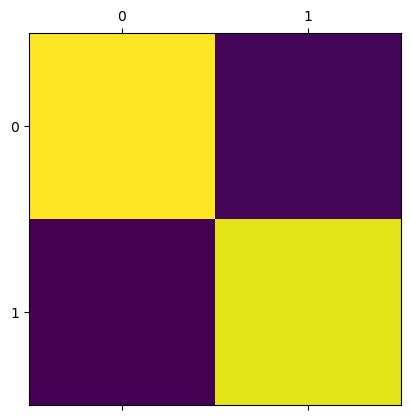

In [16]:
# We can clearly see that the two classes are linearly separable with a line that goes through (30, 1) and (40, 4)
# So we can use this line as a classifier

# if the point is above the line, it is class 0, otherwise it is class 1
def line(x):
    return 0.3 * x - 8  # from https://planetcalc.com/8110/

def threshold(x, y):
    return 0 if y > line(x) else 1

# predict
X_test_black = np.apply_along_axis(count_black_pixels, 1, X_test)
X_test_middle_black = np.apply_along_axis(count_black_pixels_middle, 1,
                                            X_test)

Y_threshold = np.array([threshold(x, y) for x, y in zip(X_test_black, X_test_middle_black)])

# compute metrics
print("metrics for threshold classification")
metrics(y_test, Y_threshold)



# TP2: decision trees

In [17]:
from sklearn import tree

SEED = 42

def test_tree(x, y, **kwargs):
    # split into train and test datasets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=SEED)

    # train the classifier
    clf = tree.DecisionTreeClassifier(**kwargs)
    clf.fit(X_train, y_train)

    # predict
    y_pred = clf.predict(X_test)

    # compute metrics
    print(f"metrics for tree classification with parameters {kwargs}")
    acuracy = accuracy_score(y_test, y_pred)

    return clf, acuracy

def prune_tree(clf, x, y, acuracy):
    ccp_alphas = clf.cost_complexity_pruning_path(x, y)['ccp_alphas']

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=SEED)

    best_clf = clf
    best_acuracy = acuracy
    for ccp_alpha in ccp_alphas:
        clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha, clf.get_params())
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acuracy = accuracy_score(y_test, y_pred)
        if acuracy > best_acuracy:
            best_acuracy = acuracy
            best_clf = clf
    
    return best_clf, best_acuracy


def test_best_tree(x, y):
    max_depths = [1,2, 3,4, 5, 10, 20]
    splitter = ['best', 'random']
    min_samples_splits = [2, 3, 4, 5, 10, 20]
    criteria = ['gini', 'entropy', 'log_loss']

    from itertools import product

    trees = [test_tree(x,y)] # test the default tree
    for parameters in product(max_depths, splitter, min_samples_splits, criteria):
        max_depth, splitter, min_samples_split, criterion = parameters
        cur_tree, acuracy = test_tree(digits.data, digits.target, max_depth=max_depth, splitter=splitter, min_samples_split=min_samples_split, criterion=criterion)

        trees.append((cur_tree, acuracy))

    print(f"calculated {len(trees)} trees")

    def keep_best_trees(trees):
        trees.sort(key=lambda x: x[1], reverse=True)
        return trees[:10]

    trees = keep_best_trees(trees)

    print(f"kept {len(trees)} trees before pruning")

    pruned_trees = []
    for tree, acuracy in trees:
        print(f"pruning tree with acuracy {acuracy}")
        cur_tree, acuracy = prune_tree(tree, digits.data, digits.target, acuracy)
        pruned_trees.append((cur_tree, acuracy))

    trees = keep_best_trees(trees + pruned_trees)

    print(f"kept {len(trees)} trees after pruning")

    # sort by ascending number of nodes
    trees.sort(key=lambda x: x[0].tree_.node_count)

    # remove all trees with 10% more nodes than the smallest
    trees = [tree for tree in trees if tree[0].tree_.node_count < trees[0][0].tree_.node_count * 1.1]

    # sort by ascending number of leaves
    trees.sort(key=lambda x: x[0].tree_.n_leaves)

    # remove all trees with 10% more leaves than the smallest
    trees = [tree for tree in trees if tree[0].tree_.n_leaves < trees[0][0].tree_.n_leaves * 1.1]

    # finally, sort by descending acuracy
    trees.sort(key=lambda x: x[1], reverse=True)

    return trees[0][0], trees[0][1]

SyntaxError: positional argument follows keyword argument (3191158781.py, line 30)

## Iris

metrics for tree classification with parameters {}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 2, 'criterion': 'gini'}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 2, 'criterion': 'entropy'}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 2, 'criterion': 'log_loss'}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 3, 'criterion': 'gini'}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 3, 'criterion': 'entropy'}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 3, 'criterion': 'log_loss'}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 4, 'criterion': 'gini'}
metrics for tree classifi

[Text(0.25009418623096447, 0.96875, 'x[36] <= 0.5\ngini = 0.9\nsamples = 1797\nvalue = [178, 182, 177, 183, 181, 182, 181, 179, 174, 180]'),
 Text(0.06091370558375635, 0.90625, 'x[28] <= 2.5\ngini = 0.547\nsamples = 275\nvalue = [174, 0, 4, 1, 6, 25, 5, 0, 3, 57]'),
 Text(0.030456852791878174, 0.84375, 'x[21] <= 0.5\ngini = 0.17\nsamples = 188\nvalue = [171, 0, 2, 0, 6, 6, 3, 0, 0, 0]'),
 Text(0.015228426395939087, 0.78125, 'x[61] <= 0.5\ngini = 0.719\nsamples = 16\nvalue = [1, 0, 1, 0, 5, 6, 3, 0, 0, 0]'),
 Text(0.01015228426395939, 0.71875, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 6, 0, 0, 0, 0]'),
 Text(0.02030456852791878, 0.71875, 'x[37] <= 5.5\ngini = 0.64\nsamples = 10\nvalue = [1, 0, 1, 0, 5, 0, 3, 0, 0, 0]'),
 Text(0.015228426395939087, 0.65625, 'x[43] <= 11.5\ngini = 0.56\nsamples = 5\nvalue = [1, 0, 1, 0, 0, 0, 3, 0, 0, 0]'),
 Text(0.01015228426395939, 0.59375, 'x[13] <= 5.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.0050761421319796

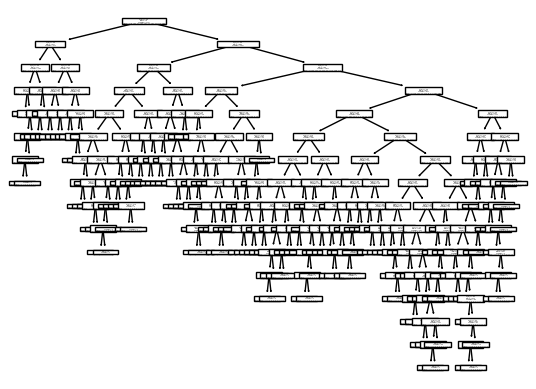

In [ ]:
iris = datasets.load_iris()

dctree, acuracy = test_best_tree(iris.data, iris.target)
print(f"best acuracy: {acuracy}")
tree.plot_tree(dctree)

## Digits

In [ ]:
digits = datasets.load_digits()
dctree, parameters = test_best_tree(digits.data, digits.target)
print(f"best acuracy: {acuracy}")
print(f"parameters: {dctree.get_params()}")
tree.plot_tree(dctree)

metrics for tree classification with parameters {}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 2, 'criterion': 'gini'}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 2, 'criterion': 'entropy'}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 2, 'criterion': 'log_loss'}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 3, 'criterion': 'gini'}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 3, 'criterion': 'entropy'}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 3, 'criterion': 'log_loss'}
metrics for tree classification with parameters {'max_depth': 1, 'splitter': 'best', 'min_samples_split': 4, 'criterion': 'gini'}
metrics for tree classifi

TypeError: sklearn.tree._classes.DecisionTreeClassifier() got multiple values for keyword argument 'ccp_alpha'

best acuracy: 0.8638888888888889
parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


[Text(0.5007861635220126, 0.9545454545454546, 'x[42] <= 7.5\nentropy = 3.32\nsamples = 1077\nvalue = [115, 112, 99, 103, 102, 104, 111, 109, 115, 107]'),
 Text(0.28891509433962265, 0.8636363636363636, 'x[43] <= 3.5\nentropy = 2.904\nsamples = 574\nvalue = [3, 72, 70, 99, 29, 95, 0, 75, 26, 105]'),
 Text(0.1289308176100629, 0.7727272727272727, 'x[26] <= 6.5\nentropy = 2.25\nsamples = 306\nvalue = [3, 29, 7, 93, 7, 62, 0, 5, 0, 100]'),
 Text(0.05660377358490566, 0.6818181818181818, 'x[30] <= 1.5\nentropy = 1.419\nsamples = 132\nvalue = [2, 5, 7, 88, 0, 0, 0, 1, 0, 29]'),
 Text(0.031446540880503145, 0.5909090909090909, 'x[62] <= 11.5\nentropy = 0.857\nsamples = 104\nvalue = [0, 4, 5, 88, 0, 0, 0, 0, 0, 7]'),
 Text(0.018867924528301886, 0.5, 'x[4] <= 8.0\nentropy = 0.302\nsamples = 93\nvalue = [0, 0, 0, 88, 0, 0, 0, 0, 0, 5]'),
 Text(0.012578616352201259, 0.4090909090909091, 'x[57] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [0, 0, 0, 3, 0, 0, 0, 0, 0, 5]'),
 Text(0.006289308176100629, 0

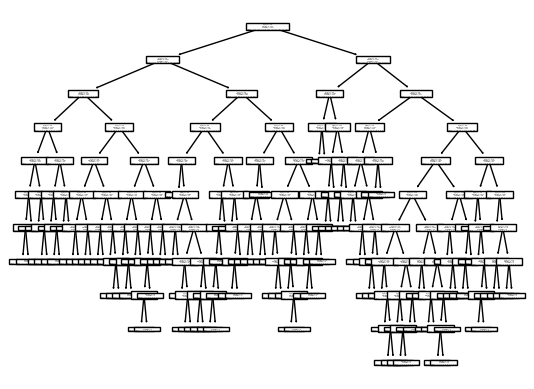

In [20]:
# Same but with GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

def find_best_decision_tree(X, y, param_grid):
    # Split the data into training, testing and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    # Create a Decision Tree classifier
    clf = DecisionTreeClassifier()

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best parameters and estimator
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Fit the best model to the training data
    best_estimator.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = best_estimator.predict(X_test)
    acuracy = accuracy_score(y_test, y_pred)

    # Evaluate the best model
    y_pred_val = best_estimator.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)

    return best_estimator, best_params, accuracy

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

best_model, best_params, accuracy = find_best_decision_tree(X, y, param_grid)
print(f"best acuracy: {accuracy}")
print(f"parameters: {best_params}")
plot_tree(best_model)

# TD3

## Digit dataset

Find the smallest dimension after PCA such that 95% of the variance is explained (hint : numpy.cumsum and numpy.where)

In [21]:
# Find the smallest dimension after PCA such that 95% of the variance
# is explained (hint : numpy.cumsum and numpy.where)

from sklearn.decomposition import PCA
import numpy as np

def find_smallest_dimension(X, variance_threshold):
    pca = PCA()
    pca.fit(X)

    cumsum = np.cumsum(pca.explained_variance_ratio_)
    d = np.argmax(cumsum >= variance_threshold) + 1
    return d

X, y = load_digits(return_X_y=True)
d = find_smallest_dimension(X, 0.95)
print(f"smallest dimension: {d}")


smallest dimension: 29


What is the proportion of explained variance in dimension 2 ?

Plot the digits after a PCA in 2D. Compare with the previous approach